## Quantified Self : Analyzing Personal Garmin Data (2012-2017)

## Anuj Katiyal (ak3979)

### Insights into my fitness journey over the last 5 years

I have been an avid runner for the past 4 years, and what has been a fun part of all those is how much we can learn about ourselves from exploring the data we capture.

I started capturing data about myself around the year 2012, which was when we saw the advent of wearable devices, and have always wanted to carry out an analysis to gain insights about my running patterns, my strength training schedules, my diet logs and any other metadata which I can collect about myself like the Heart Rate, Cadence for runs and also the step counts.

About **[Quantified Self](http://quantifiedself.com/)** : When learning about the ways to explore about the data you capture, I came across the term Quantified Self and have been following the blog ever since. Its just amazing how capturing and analyzing data about yourself can actually help me make data driven decision to improve your lifestyle and so many people are joining this movement and bringing a data-driven change for improving their lives.

** Questions which I would like to answer in my project analysis are as follows : **

* How much time have I spent on various activities like Running, Treadmill Running, Strength Training Sessions and Cardio Sessions?
* How many calories have I burnt in total for every activity and try and predict about myself that doing a specific activity, how many caloried can I burn in the future?
* An activity time vs calorie analysis for every specific activity type, which can help me make better decisions for choosing an activity based on the time I have?
* What is the time of the day that I usually do the activities and how has it changed over the past 5 years? It will help me relive the changes that have happened in my life and how they have affected my schedules.
* How does the running mileage change for the marathon seasons, as compared to off-season when we are mostly getting the body into the best shape for the running season?
* Analyzing trends about all the long distance runs (>15 kms), specifically, the average speed during the runs, the average heart rate etc.
* It has always been known that runners have lower heart rates as opposed to a normal person, evaluating this hypothesis using external data about myself.
* Which particular year has been the most exhaustive in terms of the calories burnt, the number of miles run, and the amount of time I did some physical activity?

I do take inspiration from the [Quantified Self Running archives](http://quantifiedself.com/running/) and will try and do an analysis on all these aspects about my data.

** Where the reader can find the data? **
I would like to share the data captured about all my activities if someone wants to analyze it, but as the data is about myself, I would probably not share it on a public platform. You can always mail me to get the data at ** `anujk3@gmail.com` **.

** Team ** : I will be working on my dataset and gaining insights through the analysis I do.

### Languages Used : 

Something I am really passionate about is doing data analysis work and Python has been my go to language for it. Through the course Exploratory Data Analysis and Visualizations, Prof. Joyce Robbins did help me realize how even `R` can help in quickly analyzing the data and actually the best part about `R` for me was getting to learn about `ggplot`. 

I still prefer using Python as my language for data analysis but hacked my way to use ggplot within the Python Analysis and will be doing most of my dataframe analysis in `Python` and making plots with `ggplot`, but all within a `Python Notebook`.

I will also be working on interactive visualizations using `D3.js` and whenever possible `matplotlib within Python`.

## Exploratory Data Analysis

### Import Statements and load Data

In [2]:
import pandas as pd
import warnings
from rpy2.robjects import pandas2ri
pandas2ri.activate()
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
%reload_ext rpy2.ipython
%matplotlib inline

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;

    }
</style>
""")

In [4]:
running_data = pd.read_csv("full_data.csv")

### Exploring the data and the datatypes

** Initial Peek into the data **

In [5]:
running_data.head()

,id,activityName,activityType,startTime,time,distance,elevationGain,avgSpeed(min/km),avgHR,maxHR,calories
0,1,Running,Running,"Sun, 25 Sep 2016 4:06 AM",48:23,9.48,NaN,5.06,161.0,177.0,825
1,2,Running,Running,"Wed, 21 Sep 2016 7:55 AM",13:23,2.63,NaN,5.05,143.0,164.0,191
2,3,Strength Training,Strength Training,"Tue, 20 Sep 2016 7:23 AM",1:15:28,NaN,NaN,NaN,125.0,167.0,859
3,4,Running,Running,"Sun, 18 Sep 2016 6:57 AM",30:24,4.16,NaN,7.18,157.0,188.0,502
4,5,Running,Running,"Thu, 15 Sep 2016 3:03 AM",31:12,4.22,NaN,7.23,150.0,184.0,481


** Checking the datatypes **

In [6]:
running_data.dtypes

id                    int64
activityName         object
activityType         object
startTime            object
time                 object
distance            float64
elevationGain       float64
avgSpeed(min/km)    float64
avgHR               float64
maxHR               float64
calories              int64
dtype: object

### Data Cleaning

** Drop the id column **

In [7]:
running_data.drop("id", axis=1, inplace=True) 
running_data.head()

,activityName,activityType,startTime,time,distance,elevationGain,avgSpeed(min/km),avgHR,maxHR,calories
0,Running,Running,"Sun, 25 Sep 2016 4:06 AM",48:23,9.48,NaN,5.06,161.0,177.0,825
1,Running,Running,"Wed, 21 Sep 2016 7:55 AM",13:23,2.63,NaN,5.05,143.0,164.0,191
2,Strength Training,Strength Training,"Tue, 20 Sep 2016 7:23 AM",1:15:28,NaN,NaN,NaN,125.0,167.0,859
3,Running,Running,"Sun, 18 Sep 2016 6:57 AM",30:24,4.16,NaN,7.18,157.0,188.0,502
4,Running,Running,"Thu, 15 Sep 2016 3:03 AM",31:12,4.22,NaN,7.23,150.0,184.0,481


** Converting startTime to Python DateTime Format to use the inbuilt functions **

In [8]:
running_data["startTime"] = pd.to_datetime(running_data["startTime"])
running_data.head()

,activityName,activityType,startTime,time,distance,elevationGain,avgSpeed(min/km),avgHR,maxHR,calories
0,Running,Running,2016-09-25 04:06:00,48:23,9.48,NaN,5.06,161.0,177.0,825
1,Running,Running,2016-09-21 07:55:00,13:23,2.63,NaN,5.05,143.0,164.0,191
2,Strength Training,Strength Training,2016-09-20 07:23:00,1:15:28,NaN,NaN,NaN,125.0,167.0,859
3,Running,Running,2016-09-18 06:57:00,30:24,4.16,NaN,7.18,157.0,188.0,502
4,Running,Running,2016-09-15 03:03:00,31:12,4.22,NaN,7.23,150.0,184.0,481


** Changing the column names for easy access within ggplot and matplotlib **

In [9]:
col_names = ['activityName', 'activityType', 'startTime', 'activityTime', 'runDistance', 'elevationGain', 'avgSpeed', 'avgHR', 'maxHR', 
            'calories']
running_data.columns = col_names

In [10]:
running_data.head()

,activityName,activityType,startTime,activityTime,runDistance,elevationGain,avgSpeed,avgHR,maxHR,calories
0,Running,Running,2016-09-25 04:06:00,48:23,9.48,NaN,5.06,161.0,177.0,825
1,Running,Running,2016-09-21 07:55:00,13:23,2.63,NaN,5.05,143.0,164.0,191
2,Strength Training,Strength Training,2016-09-20 07:23:00,1:15:28,NaN,NaN,NaN,125.0,167.0,859
3,Running,Running,2016-09-18 06:57:00,30:24,4.16,NaN,7.18,157.0,188.0,502
4,Running,Running,2016-09-15 03:03:00,31:12,4.22,NaN,7.23,150.0,184.0,481


** Concatenating information about the Month and Year for every activity to the DataFrame **

In [11]:
running_data["activityMonth"] = running_data.startTime.dt.month
running_data["activityDay"] = running_data.startTime.dt.dayofweek

In [12]:
running_data.head()

,activityName,activityType,startTime,activityTime,runDistance,elevationGain,avgSpeed,avgHR,maxHR,calories,activityMonth,activityDay
0,Running,Running,2016-09-25 04:06:00,48:23,9.48,NaN,5.06,161.0,177.0,825,9,6
1,Running,Running,2016-09-21 07:55:00,13:23,2.63,NaN,5.05,143.0,164.0,191,9,2
2,Strength Training,Strength Training,2016-09-20 07:23:00,1:15:28,NaN,NaN,NaN,125.0,167.0,859,9,1
3,Running,Running,2016-09-18 06:57:00,30:24,4.16,NaN,7.18,157.0,188.0,502,9,6
4,Running,Running,2016-09-15 03:03:00,31:12,4.22,NaN,7.23,150.0,184.0,481,9,3


** Calculating total minutes of an activity from the data **

In [13]:
def getMinutes(activityTime):
    curr_time = activityTime.split(":")
    if len(curr_time) == 2:
        final_time = curr_time[0] + "." + curr_time[1]
    else:
#         print curr_time
        mins = int(curr_time[0])*60 + int(curr_time[1])
        final_time = str(mins) + "." + curr_time[2]
    return final_time

In [14]:
running_data["activityMins"] = running_data.activityTime.apply(getMinutes)
running_data["activityMins"] = running_data["activityMins"].astype("float")

In [15]:
running_data.drop("activityTime", axis=1, inplace=True)
running_data.head()

,activityName,activityType,startTime,runDistance,elevationGain,avgSpeed,avgHR,maxHR,calories,activityMonth,activityDay,activityMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,9,6,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,9,2,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,9,1,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,9,6,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,9,3,31.12


In [16]:
running_data.dtypes

activityName             object
activityType             object
startTime        datetime64[ns]
runDistance             float64
elevationGain           float64
avgSpeed                float64
avgHR                   float64
maxHR                   float64
calories                  int64
activityMonth             int64
activityDay               int64
activityMins            float64
dtype: object

## Initial Analysis of Data : Continuous Variables 

### MISSING VALUES 

In [17]:
running_data.describe()

,runDistance,elevationGain,avgSpeed,avgHR,maxHR,calories,activityMonth,activityDay,activityMins
count,186.000000,110.000000,170.000000,245.000000,245.000000,393.000000,393.000000,393.000000,393.000000
mean,8.014140,62.690909,6.333882,122.734694,156.604082,619.692112,6.351145,3.193384,66.227735
std,7.351923,78.377321,1.932087,18.063612,16.230738,492.830827,3.380444,2.093054,45.324054
min,0.000000,0.000000,4.530000,77.000000,81.000000,2.000000,1.000000,0.000000,1.270000
25%,3.185000,20.500000,5.392500,111.000000,148.000000,223.000000,3.000000,1.000000,28.130000
50%,5.245000,35.000000,6.095000,121.000000,158.000000,503.000000,6.000000,3.000000,61.540000
75%,10.035000,81.750000,7.010000,134.000000,167.000000,887.000000,9.000000,5.000000,99.260000
max,42.390000,592.000000,27.060000,168.000000,188.000000,3362.000000,12.000000,6.000000,280.590000


** Looking at the count of values for all the continuous variables, we observe that out of 393 activities, 186 activities had distance recorded, 110 activities had elevationGains recorded, the average speed was recorded for 170 activities, with average and max Heart Rate being recorded for 245 activities. **

** Calories, datetime and the Activity Time were recorded for all the activities **

Some of the reasons for missing data : 

1. During the span of 5 years, I have changed 4 wearable devices. Initially I used the Garmin Vivofit tracker for all the runs, which did not have heart rate tracker. 
2. After that I bought the Garmin Forerunner 920 (GPS inbuilt), which had a heart rate strap along with it and it also used to calculate the elevationGain and many more parameters for all the runs. But I do realize that I was lazy to use the heart rate strap as it needed to be washed after every run.
3. After that I used the Garmin Vivofit2 tracker, which had inbuilt heart rate monitor but lacked GPS, so the runs were still being tracked by Garmin Forerunner 920.
4. Currently I am using the Garmin Vivoactive HR, which has an wrist HR monitor as well as an inbuilt GPS, but being in Graduate School, the frequency of runs has gone down significantly.


** All the variables in the analysis are important but lets do an initial missing data analysis with visualizations **

** *Visualization : Missing Data 1* **

In [18]:
running_data_continuous = running_data[running_data.describe().columns].copy()

NOTE: The following pairs of variables appear to have the same missingness pattern.
 Please verify whether they are in fact logically distinct variables.
     [,1]    [,2]   
[1,] "avgHR" "maxHR"


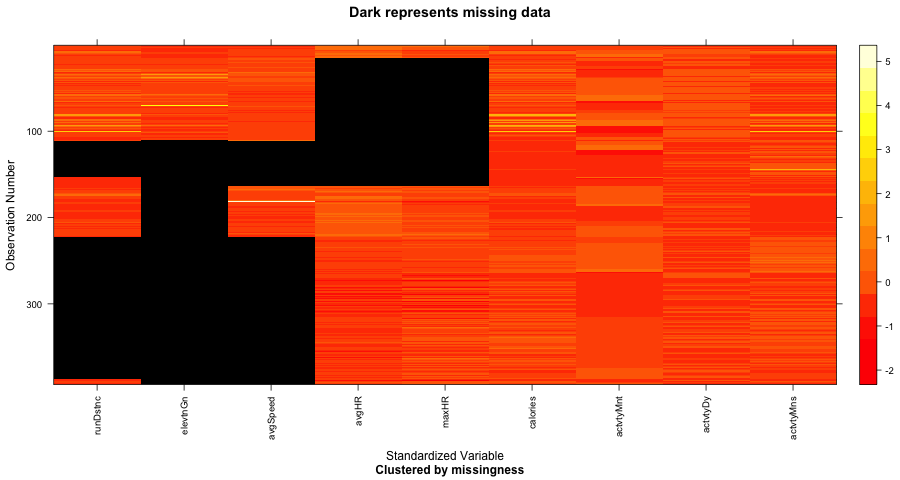

In [19]:
%%R -i running_data_continuous -w 900 -h 480 -u px

library(vcd)
library(dplyr)
library(readr)
library(grid) # for gpar
library(RColorBrewer)
library(scales)
library(knitr)
library(mi)

image(missing_data.frame(running_data_continuous))

rm(list = ls())

** *Visualization : Missing Data 2* **


 Variables sorted by number of missings: 
      Variable Count
 elevationGain   283
      avgSpeed   223
   runDistance   207
         avgHR   148
         maxHR   148
      calories     0
 activityMonth     0
   activityDay     0
  activityMins     0


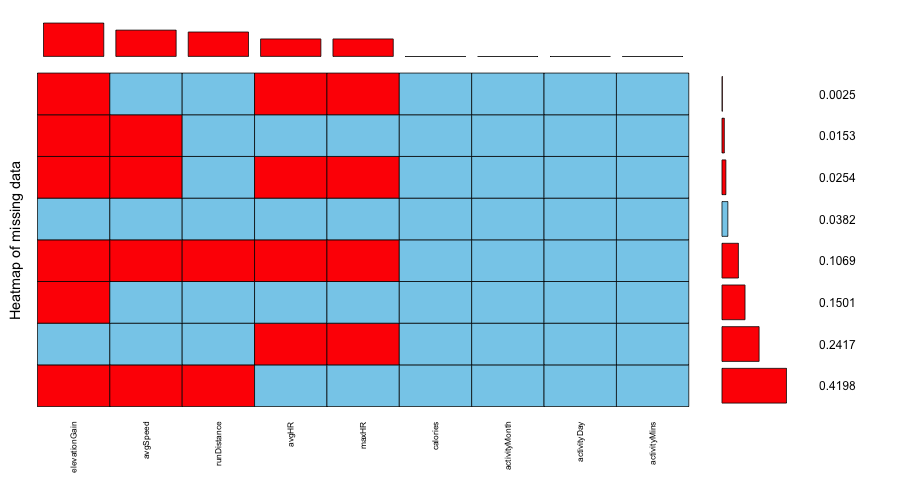

In [20]:
%%R -i running_data_continuous -w 900 -h 480 -u px

library(vcd)
library(dplyr)
library(grid) # for gpar
library(RColorBrewer)
library("VIM")
library("mice")
library(lattice)

aggr_plot <- aggr(running_data_continuous, col=c('skyblue','red'), numbers=TRUE, sortVars=TRUE, labels=names(running_data_continuous), cex.axis=.7, gap=3, ylab=c("Heatmap of missing data"), combined= TRUE)
rm(list = ls())

** Looking at the above visualization, the following patterns emerge: **

1. Average Heart Rate and Maximum Heart Rate values are missing for those specific Activities when I was using a fitness tracker which did not have Heart Rate Tracking ability.
2. The statistics like Elevation Gain were tracked when I was using a heart rate strap attached, which being lazy I didn't use often, leading to the highest number of missing values, because of which we will **not consider it as an important feature in our analysis.**
3. For the first generation fitness tracker used like Garmin Vivofit 1 and 2, even though it had capabilities to record my Running Distance based on the number of steps take, it still did not process the other metrics like Average Speed and Heart rate values.
4. Also, the Running Distance values are missing for all workouts which involved Strength Training. *If there was some recorded value for this field during Strength Training sessions due to the number of steps taken, it has been ignored and replaced with NaNs in my analysis.*

** From the above analysis, it can be seen that the most important features for further analysis are `Activity Minutes`, `Activity Month`, `Activity Day`, `Calories Burnt`, `Average Heart Rate`, `Maximum Heart Rate`, `Running Distance Covered`. The other features, specifically, `Average Speed` and `Elevation Gain` have a higher number of missing values and also not that important for future analysis, even though `Average Speed` can help me analyze the runs. **


## Univariate Data Analysis and Visualizations

In [21]:
running_data.head()

,activityName,activityType,startTime,runDistance,elevationGain,avgSpeed,avgHR,maxHR,calories,activityMonth,activityDay,activityMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,9,6,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,9,2,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,9,1,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,9,6,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,9,3,31.12


### Activity Minutes 

** *Distribution Histogram with overlayed Density Plots* **

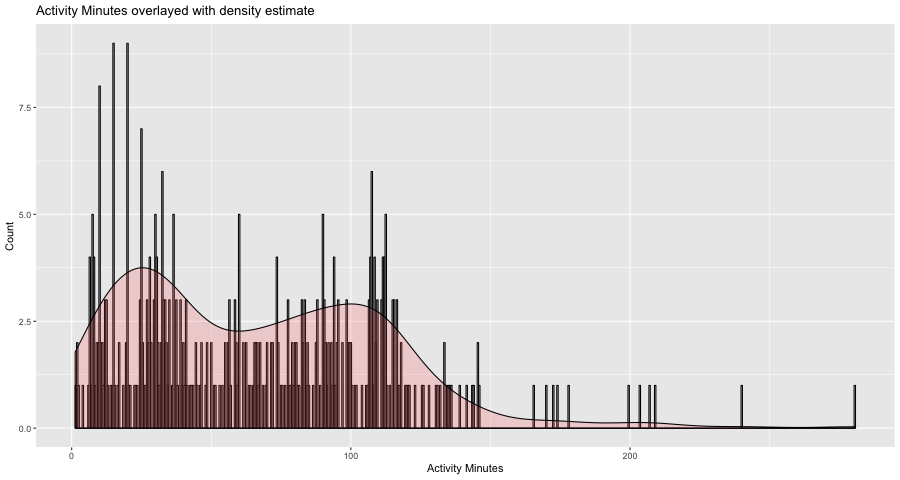

In [31]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

ggplot(running_data, aes(x=activityMins)) + 
    geom_histogram(aes(y=..count..),      # Histogram with density instead of count on y-axis
                   binwidth=0.5,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Count") +
    xlab("Activity Minutes") +
    ggtitle("Activity Minutes overlayed with density estimate")

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Activity Minutes on the x-axis along with the count of those activities on the y-axis.
2. The Distribution is clearly bi-model skewed towards the right, which can be understood as the practice runs while I was training for my first full Marathon in 2016.

** *Distribution of Activity Times across various Activities* **

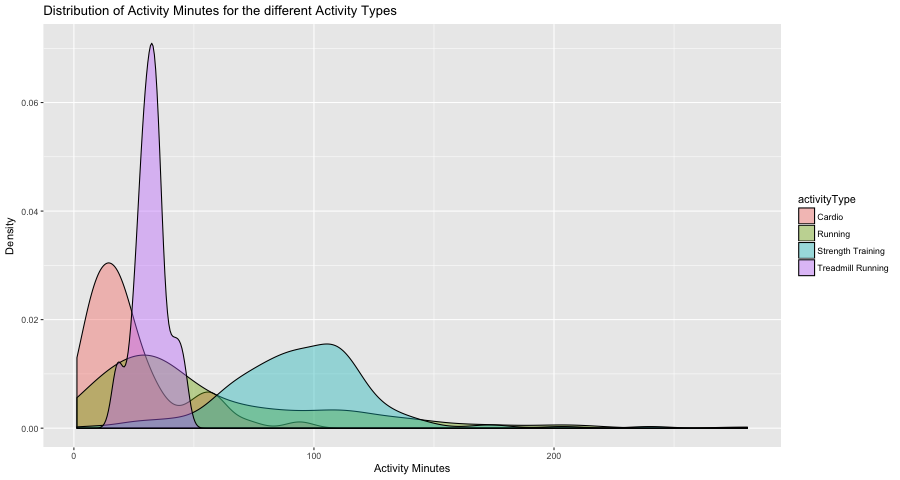

In [23]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

g1 <- ggplot(running_data, aes(x=activityMins, fill=activityType)) + 
    geom_density(alpha=0.4, adjust = 1, na.rm = TRUE) +   # Overlay with transparent density plot
    ylab("Density") +
    xlab("Activity Minutes") +
    ggtitle("Distribution of Activity Minutes for the different Activity Types")
g1

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Activity Minutes on the x-axis along with the density of those activities on the y-axis for all the activity Types.
2. The Distribution is nearly normal or skewed towards the right, which is a nice observation and helps me understand the usual minutes I spend doing a particular activity.

** *Analysis of Outliers for Activity Times* **

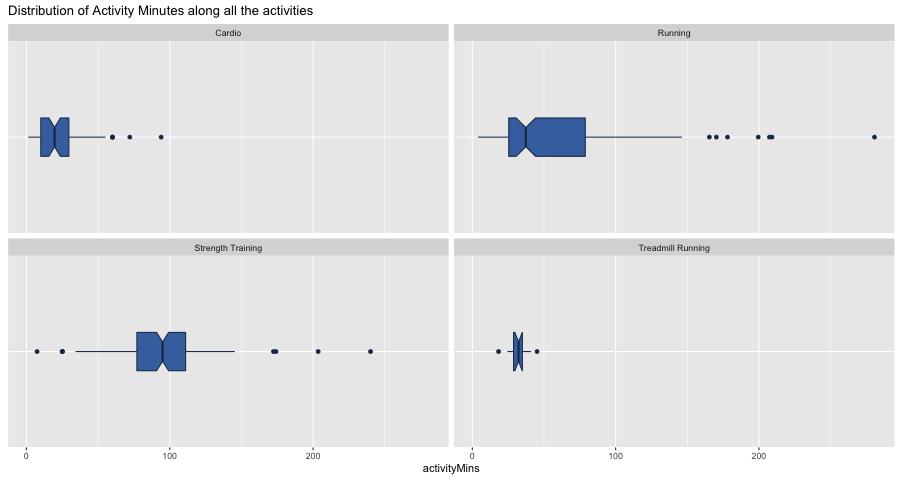

In [24]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

fill <- "#4271AE"
line <- "#1F3552"

ggplot(running_data, aes(x=factor(1), y=activityMins)) + geom_boxplot(fill = fill, colour = line, notch = TRUE, width=0.2) +
    guides(fill=FALSE) + coord_flip() + 
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    ggtitle("Distribution of Activity Minutes along all the activities") + facet_wrap( ~ activityType)

** Analysis of the above visualization: **

1. In the plot above, we want to analyze the outliers for each Activity Type of the total Activity Minutes.
2. The outliers in the right direction bring a smile to my face, as possibly those are the days I pushed myself and I don't want to comment on the outliers on the left side. The boxplots do help me understand the usual time zones doing a particular activity clearly.

### Activity Month

** How many activities have I done in every month for the past 5 years? **

In [25]:
running_data_gMonth = running_data.groupby("activityMonth").count()

In [26]:
running_data_gMonth = running_data_gMonth[["activityName"]]
running_data_gMonth.reset_index(inplace=True)

In [27]:
running_data_gMonth.rename(columns={'activityName':'Count'}, inplace=True)
#running_data_gMonth

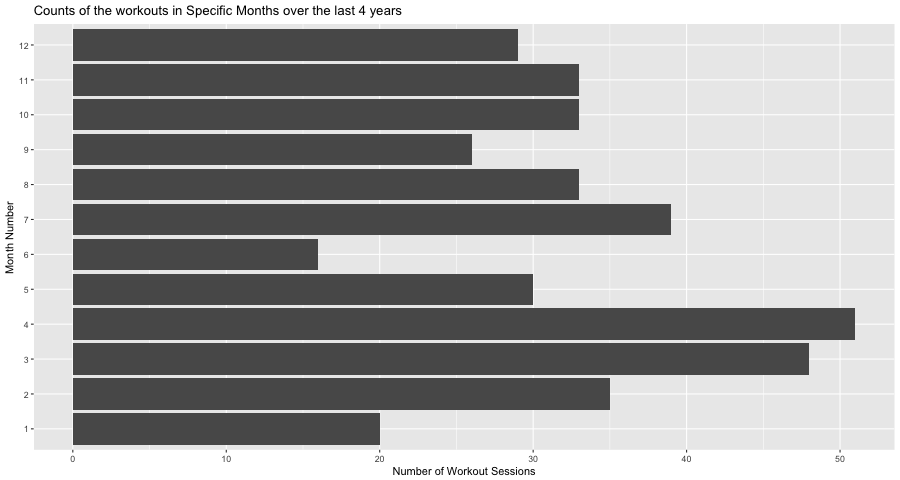

In [28]:
%%R -i running_data_gMonth -w 900 -h 480 -u px

require("ggplot2")

ggplot(running_data_gMonth, aes(x = reorder(activityMonth, activityMonth), y = Count)) + 
  geom_col() + 
  coord_flip() +
  theme(legend.position="none") +
  xlab("Month Number") +
  ylab("Number of Workout Sessions") +
  ggtitle("Counts of the workouts in Specific Months over the last 4 years")


** Analysis of the above visualization: **

1. In the plot above, I am showing the total number of workouts done in every month.
2. Okay, I will admit, this was an eye opener for me. I thought I have been regular to the gym, but the plot shows something different. The difference between the numbers can also be accounted for not tracking the specific workout sessions other than running from the years 2012-2014.
3. In the last 2 years, I have been tracking all my running workouts and the gym sessions and am happy that for some months atleast the number of workouts in the last 2-3 years did touch 50, i.e., March and April specifically - probably the onset of Spring Season.

### Activity Day

** Which activities on which day of the week? **

In [28]:
running_data_activDay = running_data.groupby(["activityDay", "activityType"])[['activityDay']].count()
running_data_activDay.rename(columns={'activityDay':'Count'}, inplace=True)
running_data_activDay.reset_index(inplace=True)
#running_data_activDay

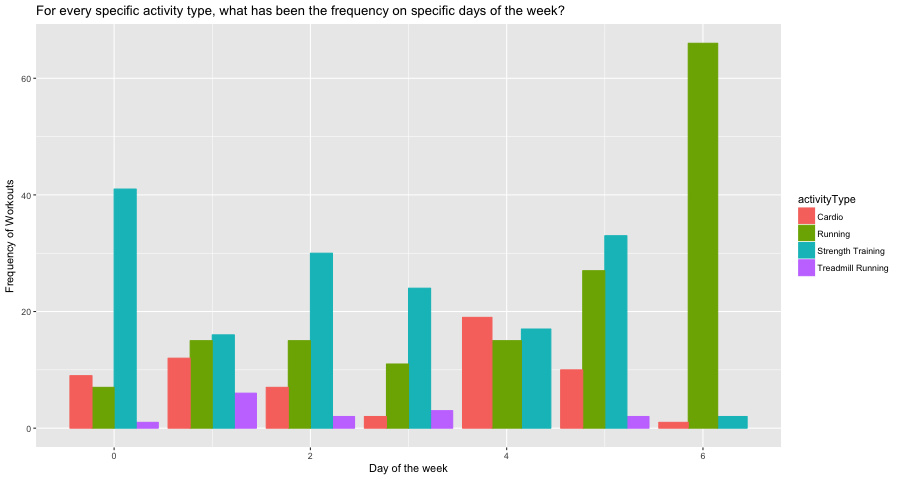

In [29]:
%%R -i running_data_activDay -w 900 -h 480 -u px

library(tidyverse)
library(ggplot2)
library(gridExtra)

g1 <- ggplot(running_data_activDay, aes(x = activityDay, y = Count, color = activityType, fill=activityType)) +
  geom_col(position = "dodge") +
  xlab("Day of the week") +
  ylab("Frequency of Workouts") +
  ggtitle("For every specific activity type, what has been the frequency on specific days of the week?")
g1

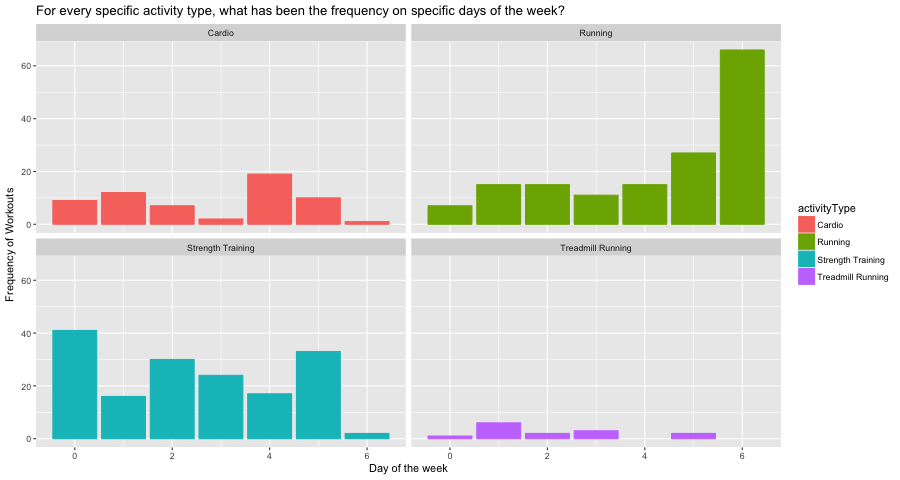

In [30]:
%%R -i running_data_activDay -w 900 -h 480 -u px

g2 <- ggplot(running_data_activDay, aes(x = activityDay, y = Count, color = activityType, fill=activityType)) +
  geom_col() + facet_wrap(~activityType) +
  xlab("Day of the week") +
  ylab("Frequency of Workouts") +
  ggtitle("For every specific activity type, what has been the frequency on specific days of the week?")
g2

** Analysis of the above visualizations: **

1. In the plots above, I am showing the total number of workouts done on a specific day of the week over the last 5 years of tracked workouts.
2. The obvious patterns from the plots are as follows:
    * The strength training sessions are evenly distributed over all the days of the week except for Sundays (rest day/running day).
    * The running count increases as I go into the week with the highest running frequency on the weekends.
    * The number of cardio and treadmill running sessions are few as compared to the other workouts but they are mostly evenly distributed throughout the week.

### Caloried Burnt 

** *Distribution Histogram with overlayed Density Plots* **

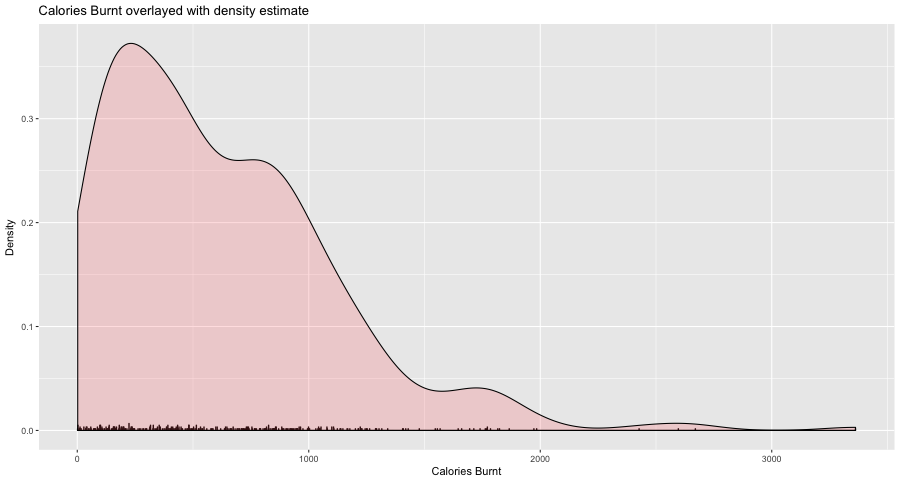

In [36]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

ggplot(running_data, aes(x=calories)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=1.5,
                   colour="black", fill="white") +
    geom_density(aes(y=..count..), alpha=.2, fill="#FF6666") +# Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Calories burnt on the x-axis along with their density plotted.
2. The Distribution is clearly multi-model skewed towards the right, which can be understood as the practice runs while I was training for my first full Marathon in 2016 had the highest amount of calories burnt, with the marathon having more than 3000 calories burnt in a workout.

** *Distribution of Calories Burnt across various Activities* **

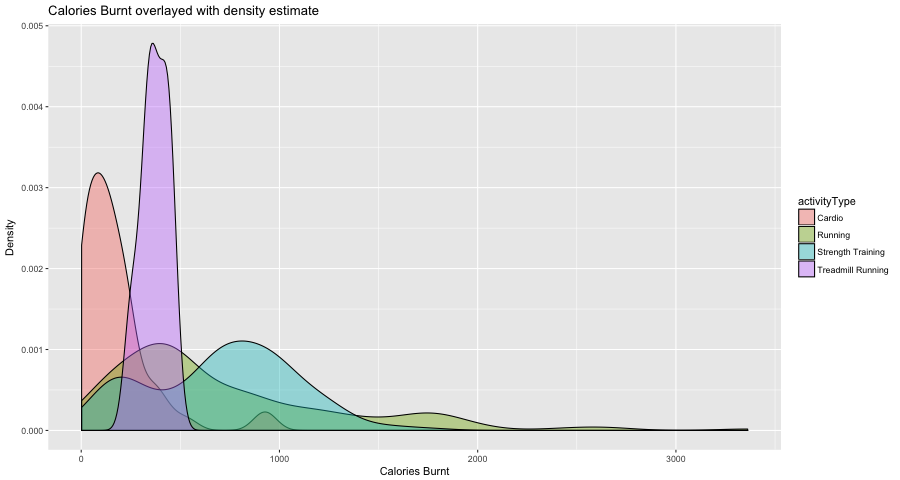

In [32]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

g1 <- ggplot(running_data, aes(x=calories, fill=activityType)) + 
    geom_density(alpha=0.4, adjust = 1, na.rm = TRUE) +   # Overlay with transparent density plot
    ylab("Density") +
    xlab("Calories Burnt") +
    ggtitle("Calories Burnt overlayed with density estimate")
g1

** Analysis of the above visualization: **

1. In the plot above, we see a distribution of Calories Burnt on the x-axis along with the density of those activities on the y-axis for all the activity Types.
2. The Distribution is nearly normal or skewed towards the right, which is a nice observation and helps me understand the usual calories burnt doing a particular activity.

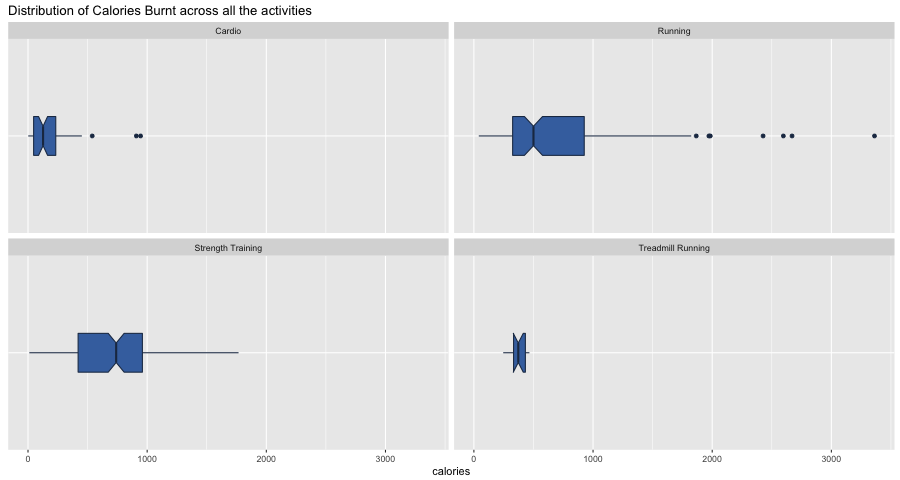

In [33]:
%%R -i running_data -w 900 -h 480 -u px

require("ggplot2")

fill <- "#4271AE"
line <- "#1F3552"

ggplot(running_data, aes(x=factor(1), y=calories)) + geom_boxplot(fill = fill, colour = line, notch = TRUE, width=0.2) +
    guides(fill=FALSE) + coord_flip() + 
    theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    ggtitle("Distribution of Calories Burnt across all the activities") + facet_wrap( ~ activityType)

** Analysis of the above visualization: **

1. In the plot above, we want to analyze the outliers for each Activity Type of the total Calories Burnt.
2. The outliers in the right direction bring a smile to my face, as possibly those are the days I pushed myself and I don't want to comment on the outliers on the left side. The boxplots do help me understand the usual calories doing a particular activity clearly.
3. Some of the observations which are worth highlighting are as follows: 
    * Strength Training sessions had no outliers and had a maximum of around 1800 calories burnt in a session.
    * Treadmill Running, even though are small in number but usually for a session did lead to around 500 calores burnt.
    * Running had the outliers in the right directions, which are all the practice runs leading upto the Full Marathon as well as the full Marathon.

## Multivariate Data Analysis

### Scatterplot Matrix

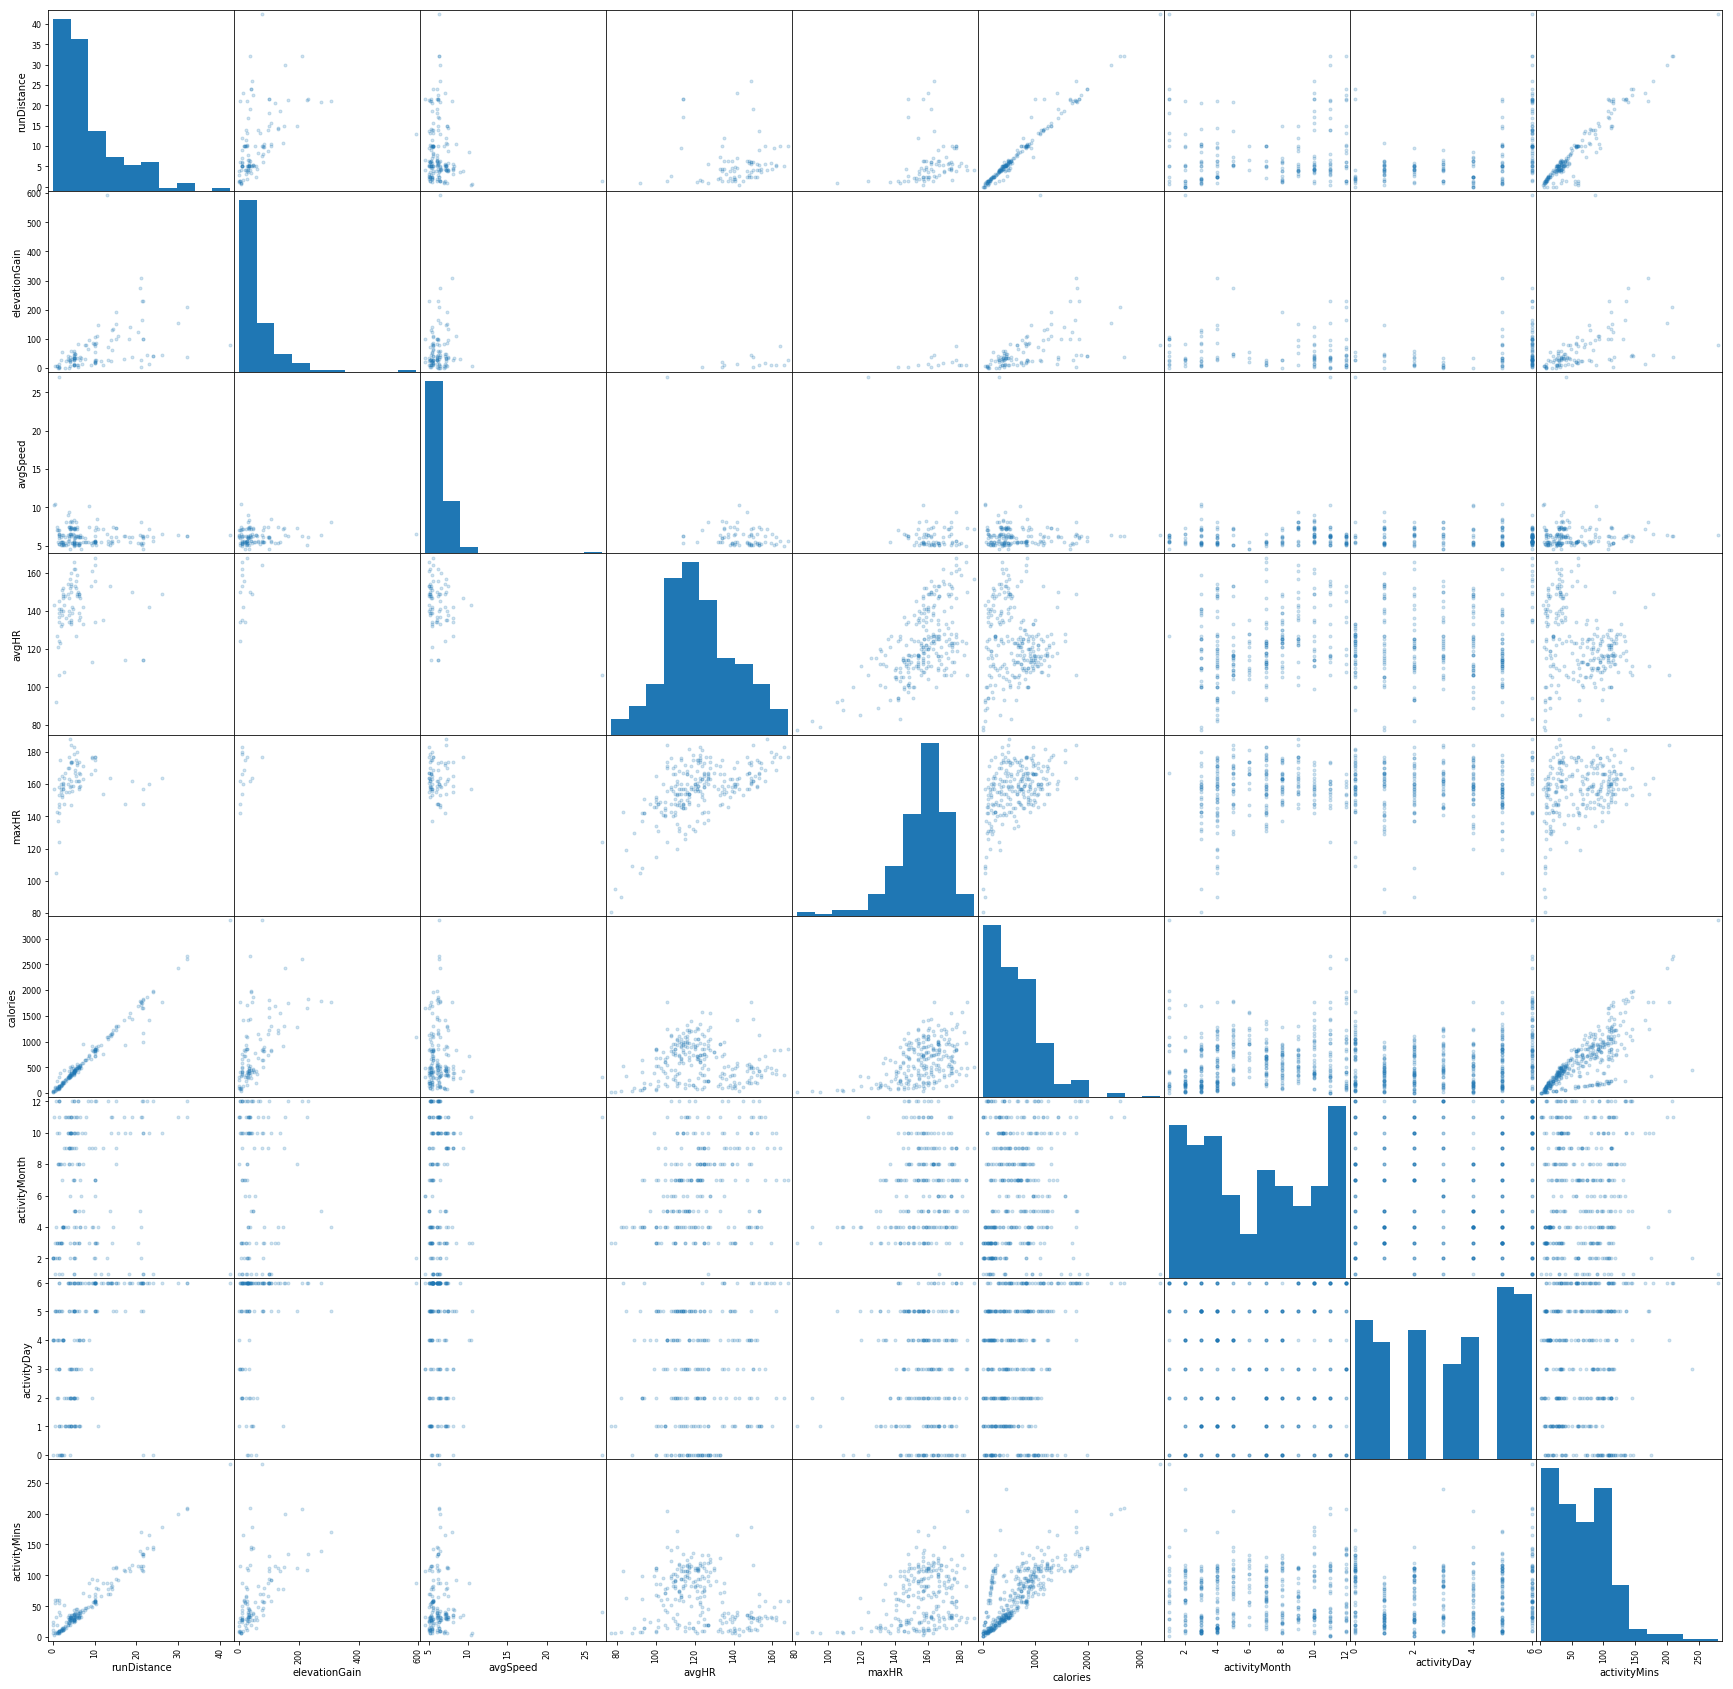

In [34]:
_ = pd.scatter_matrix(running_data, alpha=0.2, figsize=(30, 30))

** Analysis of the above visualization: **

A Scatterplot matrices is a great way to roughly determine if you have a linear correlation between multiple variables. This is particularly helpful in pinpointing specific variables that might have similar correlations amongst the dataset.

For example, Calories burnt show approximately linear correlation with the minutes of a particular activity.

** NOTE: An exploratory analysis of a few features have been done and will be expanded upon for the final project. A lot of label changes and plot changes are still required to improve the plots right now, but all these kinks will be resolved for the final project submission. **

---

---